## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df['converted'].mean()

0.11965919355605512

In [16]:
mask = (df.converted == 1)

In [17]:
df[mask]

,user_id,timestamp,group,landing_page,converted
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
15,644214,2017-01-22 02:05:21.719434,control,old_page,1
17,888545,2017-01-08 06:37:26.332945,treatment,new_page,1
26,892356,2017-01-05 09:35:14.904865,treatment,new_page,1
28,913579,2017-01-24 09:11:39.164256,control,old_page,1
32,875124,2017-01-05 15:39:25.439906,treatment,new_page,1
36,831737,2017-01-11 21:18:20.911015,control,old_page,1


In [19]:
df[mask].converted.mean()

1.0

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df.query('landing_page == "new_page" & group == "control" | landing_page == "old_page" & group == "treatment" ').user_id.count()

3893

In [7]:
df.query('landing_page == "new_page" and group == "control" or landing_page == "old_page" and group == "treatment" ').user_id.count()

3893

f. Do any of the rows have missing values?

In [8]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
#in order to successfully drop using the df.drop() function attributes 
#from a dataframe you need to identify indexes for those attributes
index_to_drop = df.query('landing_page == "new_page" & group == "control" | landing_page == "old_page" & group == "treatment" ').index

#now we can use the df.drop() function, remember to specify the axis, which is 0 for rows - attributes
df2 = df.drop(index_to_drop, axis=0)

#it's a good idea to reindex if we want an index to have a minimum of sense
#Remember to set inplace = True
df2.reset_index(drop = True, inplace= True)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
print(df2.loc[1876, :])
print(df2.loc[2862, :])

user_id                             773192
timestamp       2017-01-09 05:37:58.781806
group                            treatment
landing_page                      new_page
converted                                0
Name: 1876, dtype: object
user_id                             773192
timestamp       2017-01-14 02:55:59.590927
group                            treatment
landing_page                      new_page
converted                                0
Name: 2862, dtype: object


In [14]:
df2[df2['user_id'] == 773192 ]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
#In order to drop attributes using the drop function you need to access then using the index
df2.drop(1876, axis=0);

In [16]:
#it's a good idea to reindex if we want an index to have a minimum of sense of the new dataframe
#Remember to set inplace = True
df2.reset_index(drop = True, inplace= True)

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
df2.converted.mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
df2.query('group == "treatment"')['converted'].mean()

0.11880724790277405

d. What is the probability that an individual received the new page?

In [21]:
(df2.query('landing_page == "new_page"').landing_page.count())/df2.shape[0]

0.5000636646764286

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

In [ ]:
difference = []
control = df2.query('group == "control"')['converted']
treatment = df2.query('group == "treatment"')['converted']
for _ in range(10000):
    control_sample = np.random.choice(control, len(control), replace = True)
    treatment_sample = np.random.choice(treatment, len(treatment), replace = True)
    difference.append(treatment_sample.mean()-control_sample.mean())

In [ ]:
plt.hist(difference);

In [22]:
control_converted = df2.query('group == "control"')['converted']
np.random.choice(control_converted, len(control_converted), replace=True)

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
sample = _
sample.mean()

0.12031746905846882

**Your answer goes here.**

After considering descriptive statistics provided at
https://github.com/chpolyzo/DAND/blob/master/Descriptive_Statistics_AB_testing.ipynb
I would probably do the following:
1. Run the test again because timestamp information really doesn't convince me AT ALL
2. Look potentially other management improvements in the company that might be underperforming
However I will go forward to discover inferential statistics.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

Pretend data is real.  
1. $p_{old}$ refers to the proportion of conersion in the $control$ group: This proportion is 0.120
2. $p_{new}$ refers to the proportion of conersion in the $treatment$ group: This propoortion is 0.118

Converted Proportions in the treatment group is the same ain the control group when examining our sample. Is this the case for our popuation too? We only have one proportion for treatment group converted and only one proportion for control group converted. We should be running a hypothesis test if we were to see normal patterns -human patterns in business data - while performing descriptive statistics analysis and more precisely if the timestamp would confirm our thesis that we have randomly generated data to play with. In our A/B test we will be simulating 10 000 proportions and compare our resunt with the very one proportion we have from our sample and we will see the degree in which this can be true. 

<center> $H_0$ : $p_{new}$ <= $p_{old}$ </center>
<center> $H_1$ : $p_{new}$ > $p_{old}$ </center>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [24]:
#Here I calculate my very one conversion rate for the TREATMENT group under the null - This just one value. From my sample
p_new = df2.converted.mean()
p_new

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [25]:
#Here I calculate my very one conversion rate for the CONTROL group under the null - This just one value. From my sample
p_old = df2.converted.mean()
p_old

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [26]:
#Here I count the number of ALL individuals for the TREATMENT group
n_new = df2[df2['group'] =='treatment'].converted.count()
n_new

145311

d. What is $n_{old}$, the number of individuals in the control group?

In [27]:
#Here I count the number of ALL individuals for the CONTROL group
n_old = df2[df2['group'] =='control'].converted.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

>In order to create those $n_{new}$ transactions with a conversion rate of $p_{new}$ - that is an array of ones and zeros so we need to use `numpy.random.choice(a = [0,1], size = 'the output shape', p = ['probability for the first element in a', 'probability for the second elemet in a'])` that randomly choses a number of values from an array that you provide.  

>We can simulate event outcomes by generating random numbers with numpy's random.choice() and random.randint()
However there is a better function for simulating large binomial experiments like coin flips with numpy.random.binomial()
The outcome from `numpy.random.binomial(n = "number of flips", p = "probability of success", size = "the number of times we test our n coin flips" )` is one ineger representing the number of successes. This function is only for binomial outcomes.

In [28]:
#total df2 attriutes
n = df2.shape[0]
n

290585

Text(0,0.5,'Count')

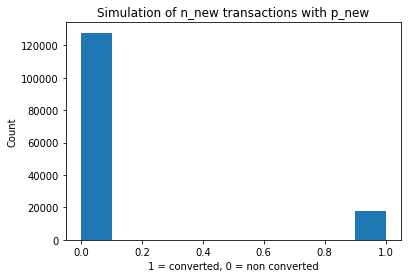

In [29]:
new_page_converted = np.random.choice([0,1], n_new, p=[1 - p_new, p_new])
plt.hist(new_page_converted)
plt.title('Simulation of n_new transactions with p_new')
plt.xlabel('1 = converted, 0 = non converted')
plt.ylabel('Count')

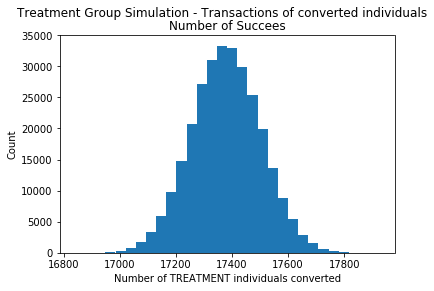

In [30]:
#Here I test 290585 times (n = total df2 attributes) the success of 145311 "coin flips" (n_new) 
#with the probability of success 0,12 (p_new = p_converted) 
new_page = np.random.binomial(n_new, p_new, n)
plt.hist(new_page, 30) #thirty bins
plt.title("Number of Succees")
plt.suptitle("Treatment Group Simulation - Transactions of converted individuals")
plt.xlabel("Number of TREATMENT individuals converted")
plt.ylabel("Count");

When possible, it is always more computationally efficient to use numpy built-in operations over explicit for loops. The short reason is that numpy -based operations attack a computational problem based on vectors by computing large chunks simultaneously. Additionally, using loops to simulate 10000 can take a considerable amount of time vs using numpy. (https://softwareengineering.stackexchange.com/questions/254475/how-do-i-move-away-from-the-for-loop-school-of-thought)

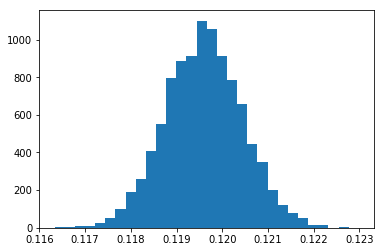

In [37]:
new_converted_simulation = np.random.binomial(n_new, p_new,  10000)/n_new
plt.hist(new_converted_simulation, 30);

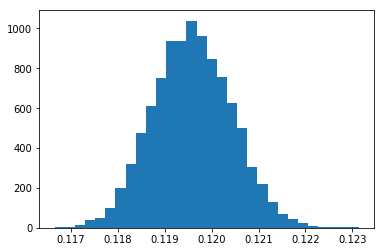

In [38]:
old_converted_simulation = np.random.binomial(n_old, p_old,  10000)/n_old
plt.hist(old_converted_simulation, 30);

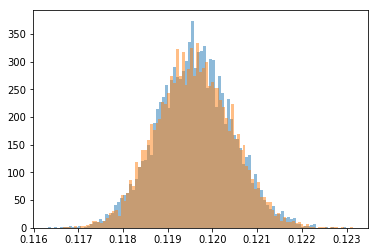

In [42]:
plt.hist(new_converted_simulation, 100, alpha = 0.5)
plt.hist(old_converted_simulation, 100, alpha = 0.5);

In [47]:
obs_diff = df2.query('group == "treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()
obs_diff

-0.0015790565976871451

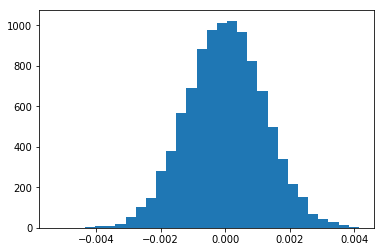

In [46]:
p_diffs = new_converted_simulation - old_converted_simulation
plt.hist(p_diffs, 30);

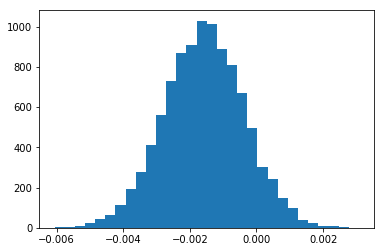

In [52]:
null_vals = np.random.normal(obs_diff,np.array(p_diffs).std(), 10000)
plt.hist(null_vals, 30);

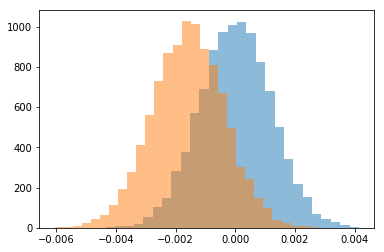

In [53]:
plt.hist(p_diffs, 30, alpha = 0.5);
plt.hist(null_vals, 30, alpha = 0.5);

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [ ]:
old_page_converted = np.random.choice([0,1], n_old, p=[1 - p_old, p_old])
plt.hist(old_page_converted)
plt.title('Simulation of n_old transactions with p_old')
plt.xlabel('1 = converted, 0 = non converted')
plt.ylabel('Count');

In [ ]:
#Here I test 290585 times (n = total df2 attributes) the success of 145311 "coin flips" (n_old) 
#with the probability of success 0,12 (p_old = p_converted) 
old_page = np.random.binomial(n_old, p_old, n)
plt.hist(old_page, 30) #thirty bins
plt.title("Number of Succees")
plt.suptitle("Control Group Simulation - Transactions of converted individuals")
plt.xlabel("Number of CONTROL individuals converted")
plt.ylabel("Count");

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [ ]:
print(new_page_converted.mean()) #number of converted individuals in the treatment group
print(old_page_converted.mean()) #number of converted individuals in the control group
print(old_page_converted.mean() - new_page_converted.mean()) #Difference in people 
print(old_page_converted.mean()/n - new_page_converted.mean()/n) #Difference in proportions

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [ ]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0,1], n_new, p=[1 - p_new, p_new]) #create a 145311 long array of zeros and ones
    old_page_converted = np.random.choice([0,1], n_old, p=[1 - p_old, p_old]) #create a 145274 long array of zeros and ones
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean()) #find the difference in means

In [ ]:
p_diffs_binomial = []

for _ in range(10000):
    #number of successes (that is one for success, zero for non success) with a probability of p_new from a 145311 sample
    new_page_converted = np.random.binomial(1, p_new, n_new) 
    #number of successes (that is one for success, zero for non success) with a probability of p_old from a 145274 sample
    old_page_converted = np.random.binomial(1, p_old, n_old)
    p_diffs_binomial.append(new_page_converted.mean() - old_page_converted.mean())

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = [15, 5], sharex=True)
fig.suptitle('np.random.binomial()')

ax1.hist(np.random.binomial(1, p_new, n_new))
ax1.set_title('Simulation of n_new transactions with p_new')
ax1.set_xlabel('1 = converted, 0 = non converted')
ax1.set_ylabel('Count')

ax2.hist(np.random.binomial(1, p_old, n_old))
ax2.set_title('Simulation of n_old transactions with p_old')
ax2.set_xlabel('1 = converted, 0 = non converted')
ax2.set_ylabel('Count');

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = [15, 5], sharex = True)
fig.suptitle('10,000  p_new - p_old simulated  values')

ax1.hist(p_diffs, 100)
ax2.hist(p_diffs_binomial, 100);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [ ]:
obs_diff = df2.query('group == "treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()
obs_diff

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = [15, 5], sharex = True)
fig.suptitle('10,000  p_new - p_old simulated  values')

ax1.hist(p_diffs, 100)
ax1.axvline(x = obs_diff, color = 'r')
ax2.hist(p_diffs_binomial, 100)
ax2.axvline(x = obs_diff, color = 'r');


In [ ]:
(p_diffs > obs_diff).mean()

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [ ]:
import statsmodels.api as sm

convert_old = df2.query('converted == 1 & landing_page == "old_page"').shape[0]
convert_new = df2.query('converted == 1 & landing_page == "new_page"').shape[0]
n_old = df2[df2['landing_page'] == 'old_page'].shape[0]
n_new = df2[df2['landing_page'] == 'new_page'].shape[0]
convert_old, convert_new, n_old, n_new

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [ ]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

In [ ]:
import scipy.stats as stats
import math

In [ ]:
x = np.linspace(0 - 3*z_score, 0 + 3*z_score, 100)
plt.plot(x, stats.norm.pdf(x, 0, z_score));
plt.axvline(x = -z_score, color = 'r'); #because our observed value is negative
plt.show();

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])